![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39123704-ea58fb38-46f8-11e8-883c-d01f27909c43.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: Marketing Analysis

Your homework for today is to clean, normalize and analyze a dataset gathered from shopping mall customers in the San Francisco Bay area. It's a survey done in 1987, so you might expect many data-entry related errors.

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Hands on! 

The dataset is contained in `data/marketing.csv` along with a file that describes the fields (`data/marketing-description.txt`).

What inconsistencies can you find? What are the fields with more issues? How can you transform the data to be expressed in a better way? What variables are related and at what extent?

All these are the questions that you should be asking and answering.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set(rc={'figure.figsize': (18, 6)})

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset `data/marketing.csv` as a Pandas dataframe on a variable called `df`.
        </td>
    </tr>
</table>

We don't want you to get stuck with this step. Reading and parsing CSV's with incorrect structure, encoding or separators can be tedious. Only for this step, the solution is provided. Your job is to keep completing the cells that are empty and have the `Your code goes here` comment.

In [5]:
df = pd.read_csv('data/marketing.csv', sep=';')

In [6]:
df.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
1,2,1,5.0,4,5,5,3,3,0,Own,1,7,?,76004
2,Male,1,5.0,5,5,5,3,5,2,Own,1,7,1,76004
3,2,1,3.0,5,1,5,2,3,1,Rent,3,7,1,34000
4,2,5,1.0,2,6,5,1,4,2,Live with Parents/Family,1,7,1,9136
5,2,5,1.0,2,6,3,1,4,2,Live with Parents/Family,1,7,1,9136


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Check if there is any null value on the dataframe.
        </td>
    </tr>
</table>

> ⚠️ <i>Sometimes null values are represented by special characters, check <b>unique values</b> to find them.</i>

In [7]:
# Your code goes here
df.isnull().sum()

Sex                  3
MaritalStatus        2
Age                  2
Education            1
Occupation          12
YearsInSf            0
DualIncome           0
HouseholdMembers     4
Under18              0
HouseholdStatus      3
TypeOfHome           0
EthnicClass          4
Language             1
AnualIncome          6
dtype: int64

In [8]:
for column in df:
    print('{} values are: {}'.format(column, df[column].unique()))

Sex values are: ['2' 'Male' '8' nan '9']
MaritalStatus values are: ['1' '5' '3' '2' '4' '?' nan]
Age values are: [ 5.  3.  1.  6.  2.  7.  4. nan]
Education values are: ['4' '5' '2' '3' '6' nan '1' '?']
Occupation values are: ['5' '1' '6' '8' '9' '3' '2' '?' nan '4' '7']
YearsInSf values are: ['5' '3' '4' '2' '1' '?']
DualIncome values are: [3 2 1]
HouseholdMembers values are: ['3' '5' '4' '2' '1' nan '6' '?' '7' '8' '9']
Under18 values are: [0 2 1 3 4 5 6 8 7 9]
HouseholdStatus values are: ['Own' 'Rent' 'Live with Parents/Family' nan '?' 'Rental'
 'Live with Parents' 'Live with Family' 'Live with Fam']
TypeOfHome values are: ['1' '3' '5' '2' '4' '?']
EthnicClass values are: ['7' '5' '2' '3' '8' '4' '1' '?' '6' nan]
Language values are: ['?' '1' '2' '3' nan]
AnualIncome values are: ['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894'
 '7600000000000000004' '27591' '19997' '253600' '35500' '7' '7540' '?' nan
 '91000000000036' '468940000000000000000000000000' '5740' '460' '155

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3.</span>
            Remove the rows that contain invalid values.
        </td>
    </tr>
</table>

In [9]:
# Your code goes here
df = df.replace({'?': np.nan})


In [10]:
df = df.replace({
    'Sex': {
        'Male': '1',
        '8' : np.nan,
        '9' : np.nan
    }
})

In [11]:
df = df.dropna()

In [12]:
for column in df:
    print('{} values are: {}'.format(column, df[column].unique()))
    

Sex values are: ['1' '2']
MaritalStatus values are: ['1' '5' '3' '2' '4']
Age values are: [5. 3. 1. 6. 2. 7. 4.]
Education values are: ['5' '2' '4' '3' '6' '1']
Occupation values are: ['5' '1' '6' '8' '9' '3' '2' '4' '7']
YearsInSf values are: ['5' '3' '4' '2' '1']
DualIncome values are: [3 2 1]
HouseholdMembers values are: ['5' '3' '4' '2' '1' '6' '7' '9' '8']
Under18 values are: [2 1 0 3 4 5 6 8 7 9]
HouseholdStatus values are: ['Own' 'Rent' 'Live with Parents/Family' 'Rental' 'Live with Parents'
 'Live with Family' 'Live with Fam']
TypeOfHome values are: ['1' '3' '5' '2' '4']
EthnicClass values are: ['7' '5' '2' '3' '4' '8' '1' '6']
Language values are: ['1' '3' '2']
AnualIncome values are: ['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894' '27591'
 '19997' '253600' '7' '7540' '91000000000036' '5740' '460' '2460' '9460'
 '150500' '75500']


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Show <b>basic descriptive statistics</b> (mean, mix, max...) of the data.
        </td>
    </tr>
</table>

In [13]:
# Your code goes here
df.describe()


,Age,DualIncome,Under18
count,6845.000000,6845.000000,6845.000000
mean,3.407889,1.549744,0.688240
std,1.609857,0.737680,1.082828
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,0.000000
50%,3.000000,1.000000,0.000000
75%,4.000000,2.000000,1.000000
max,7.000000,3.000000,9.000000


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Show a boxplot of `AnualIncome` variable.
        </td>
    </tr>
</table>

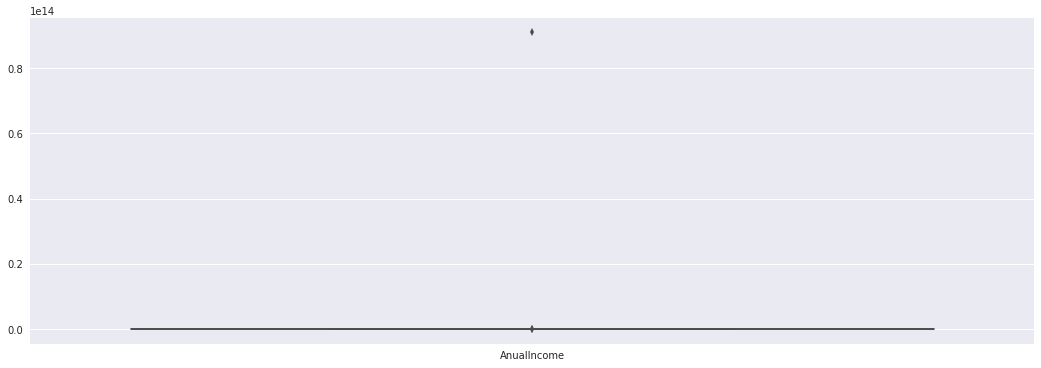

In [14]:
# Your code goes here

sns.boxplot(data=df['AnualIncome'].to_frame())

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6.</span>
            Identify outlier values on `AnualIncome` and remove them.
        </td>
    </tr>
</table>

In [15]:
# Your code goes here

df['AnualIncome'].unique()

array(['76004', '34000', '9136', '66994', '32171', '11703', '21672',
       '46894', '27591', '19997', '253600', '7', '7540', '91000000000036',
       '5740', '460', '2460', '9460', '150500', '75500'], dtype=object)

In [16]:
outliers = ['253600','91000000000036', '150500']
df = df.loc[~df['AnualIncome'].isin(outliers)]
df['AnualIncome'].unique()

array(['76004', '34000', '9136', '66994', '32171', '11703', '21672',
       '46894', '27591', '19997', '7', '7540', '5740', '460', '2460',
       '9460', '75500'], dtype=object)

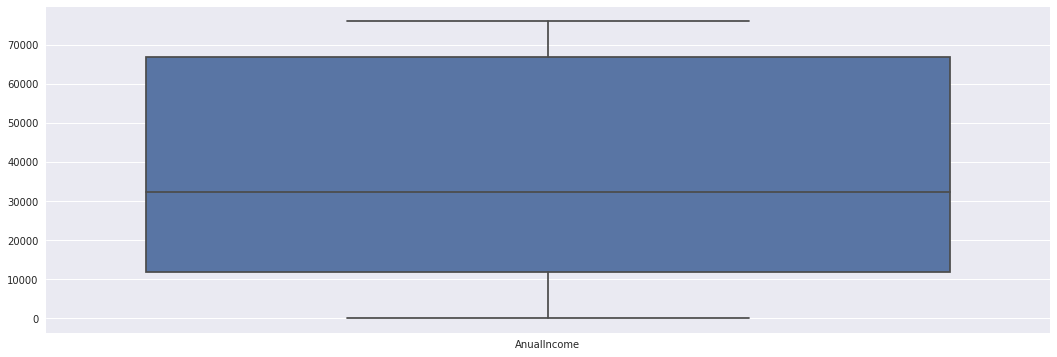

In [17]:
sns.boxplot(data=df['AnualIncome'].to_frame())

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Show two different `countplot` for `Sex` and `Education` variables.
        </td>
    </tr>
</table>

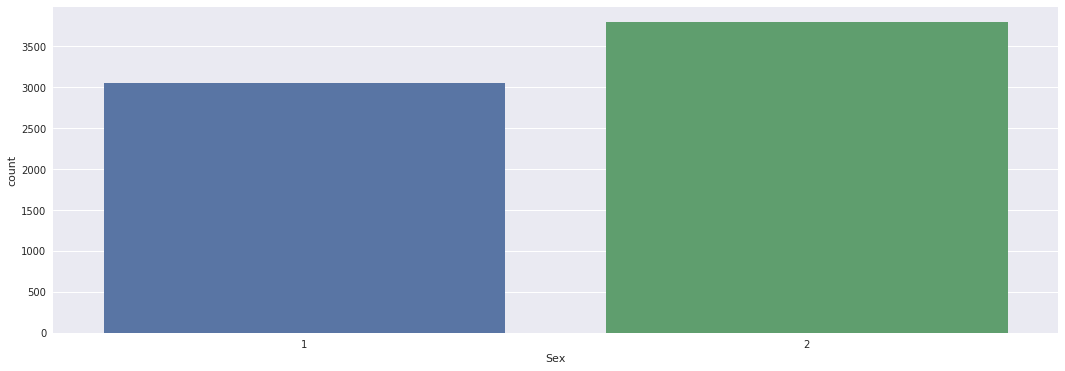

In [18]:
# Your code goes here
sns.countplot(data=df, x='Sex')


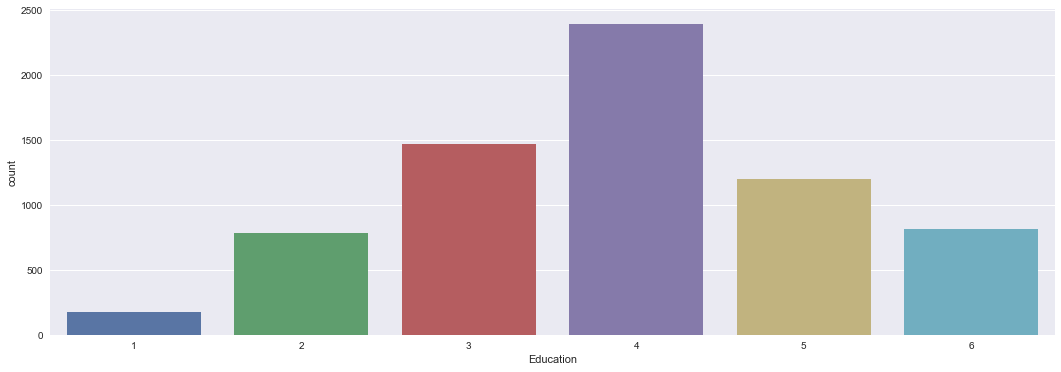

In [16]:
# Your code goes here

sns.countplot(data=df, x='Education')

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Show only `Sex` and `HouseholdStatus` of the first 20 observations.
        </td>
    </tr>
</table>

In [19]:
# Your code goes here

df[['Sex', 'HouseholdStatus']][0:20]

,Sex,HouseholdStatus
2,1,Own
3,2,Rent
4,2,Live with Parents/Family
5,2,Live with Parents/Family
6,1,Own
7,1,Rent
8,1,Rent
9,1,Rent
10,1,Rent
11,1,Rent


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Show only `MaritalStatus` of the observations in position 247.
        </td>
    </tr>
</table>

In [20]:
# Your code goes here
df['MaritalStatus'][247]


'1'

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            How many males answered the survey?
        </td>
    </tr>
</table>

In [21]:
# Your code goes here

df['Sex'][df['Sex'] == '1'].count()

3049

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">11.</span>
            How many people "Live with Parents/Family"?
        </td>
    </tr>
</table>

> ⚠️ <i>Remember "Live with Parents/Family" is on `HouseholdStatus` column.</i>

In [ ]:
# Your code goes here

df['HouseholdStatus'][df['HouseholdStatus'] == 'Live with Parents/Family'].count()

---

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Optional exercises

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">12.</span>
            What is the most common `EthnicClass`?
        </td>
    </tr>
</table>

In [17]:
# Your code goes here
df.groupby('EthnicClass')['EthnicClass'].count().sort_values(ascending=False)


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">13.</span>
            Which occupation gets the highest anual income?
        </td>
    </tr>
</table>

In [19]:
# parse AnualIncome as int
df['AnualIncome'] = df['AnualIncome'].apply(int)

# Your code goes here
df.groupby('Occupation')['Occupation', 'AnualIncome'].sum().sort_values(by='AnualIncome', ascending=False)


![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)